In [1]:
from serial import Serial
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

dev = Serial(port='/dev/ttyUSB1', baudrate=115200, timeout=1)
dev.reset_input_buffer()
dev.reset_output_buffer()


393 266 520


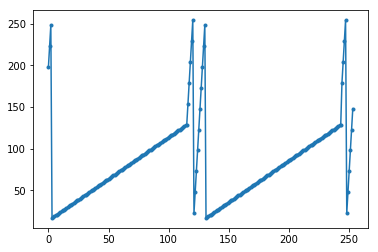

In [2]:
# read all samples
dev.write(b'\x22')  # start sample-reader
samples = dev.read(255)
samples = [int(x) for x in samples]

dev.write(b'\x24')
offset = ord(dev.read(1)) + 255
print(offset, offset-127, offset+127)
post = (samples + samples + samples)[offset-127:offset+127]

a = np.array(post)
plt.plot(a, '.-')

sample offset =  131


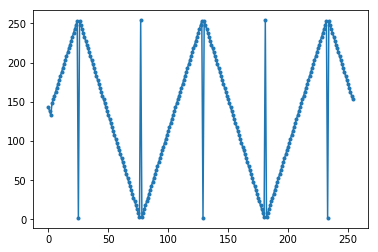

In [3]:
# clear memmory
dev.write(b'\x23')
dev.write(b'\x00')

dev.write(b'\x25')  # run adc selector
dev.write(b'\x01')  # choose adc
sleep(1)

dev.write(b'\x21')  # select sampler
sleep(3)  # wait for sampler to aquire all samples

# read all samples
dev.write(b'\x22')  # start sample-reader
samples = dev.read(255)
# print(samples)  # read all samples
# print('sample count = ', len(samples))
dev.write(b'\x24')
sample_offest = ord(dev.read(1))
print('sample offset = ', sample_offest)

a = np.array([int(x) for x in samples])
plots = plt.plot(a, '.-')

389 262 516


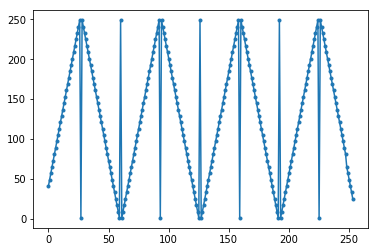

In [4]:
# clear memmory
dev.write(b'\x23')
dev.write(b'\x00')

dev.write(b'\x25')  # run adc selector
dev.write(b'\x02')  # choose adc
sleep(1)

dev.write(b'\x21')  # select sampler
sleep(1)  # wait for sampler to aquire all samples

# read all samples
dev.write(b'\x22')  # start sample-reader
samples = dev.read(255)
samples = [int(x) for x in samples]

dev.write(b'\x24')
offset = ord(dev.read(1)) + 255
print(offset, offset-127, offset+127)
post = (samples + samples + samples)[offset-127:offset+127]

a = np.array(post)
plt.plot(a, '.-')